### Q3) Read the data file DOData.csv into a DataFrame and perform the following tasks:

In [28]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy.interpolate import interp1d

do_data_url = 'https://bsrvp.github.io/data/DOData.csv'  
nut_average_url = 'https://bsrvp.github.io/data/NutAverage.xlsx'  
df = pd.read_excel(nut_average_url) 
df3=pd.read_csv(do_data_url)

In [4]:
df3

,Days,DO
0,1,7.96
1,47,8.60
2,78,7.92
3,116,7.78
4,143,8.70
5,181,8.87
6,210,9.07
7,236,9.83
8,270,8.32
9,298,7.85


Plot the monthly DO data using a bar plot.

In [42]:
month_days = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]   
df3['Month'] = pd.cut(df3['Days'], bins=month_days, labels=np.arange(1, 13), right=False)   
monthly_do = df3.groupby('Month')['DO'].mean().reset_index()  
print("\nMonthly Average DO:")  
print(monthly_do)  


Monthly Average DO:
   Month    DO
0      1  7.96
1      2  8.60
2      3  7.92
3      4  7.78
4      5  8.70
5      6   NaN
6      7  8.97
7      8  9.83
8      9  8.32
9     10  7.85
10    11  8.38
11    12   NaN


C:\Users\harne\AppData\Local\Temp\ipykernel_14080\652460764.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_do = df3.groupby('Month')['DO'].mean().reset_index()


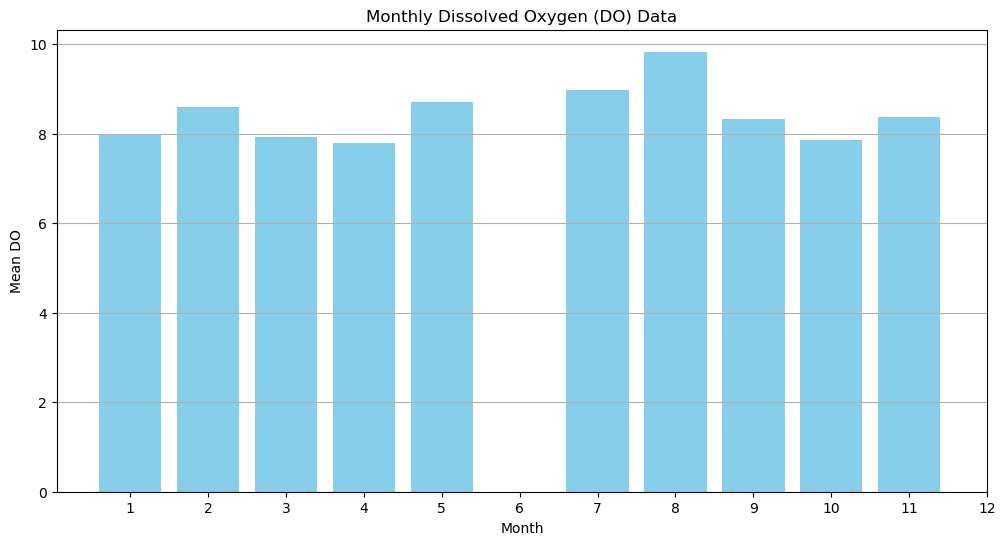

In [43]:
plt.figure(figsize=(12, 6))  
plt.bar(monthly_do['Month'], monthly_do['DO'], color='skyblue')  
plt.title('Monthly Dissolved Oxygen (DO) Data')  
plt.xlabel('Month')  
plt.ylabel('Mean DO')  
plt.xticks(monthly_do['Month'])  
plt.grid(axis='y')  
plt.show()  

Plot the monthly DO vs NH4 (from NutAverage.xlsx) as a scatter plot.

In [16]:
df['Month'] = np.arange(1, len(df) + 1) 
print(df.head()) 
monthly_nh4 = df.groupby('Month', observed=False)['NH4-N'].mean().reset_index() 
monthly_nh4

   Day Count     NH4-N     NO2-N     NO3-N         TN  Month
0          1  6.915879  2.885372  7.457832  35.834969      1
1         47  6.344965  2.852123  5.696753  36.359106      2
2         78  4.964745  2.090747  2.167375  40.719987      3
3        116  4.361492  2.301630  1.653266  24.931194      4
4        143  3.980372  1.419541  0.233538  36.234797      5


,Month,NH4-N
0,1,6.915879
1,2,6.344965
2,3,4.964745
3,4,4.361492
4,5,3.980372
5,6,4.814007
6,7,5.774826
7,8,4.439287
8,9,2.394753
9,10,1.956891


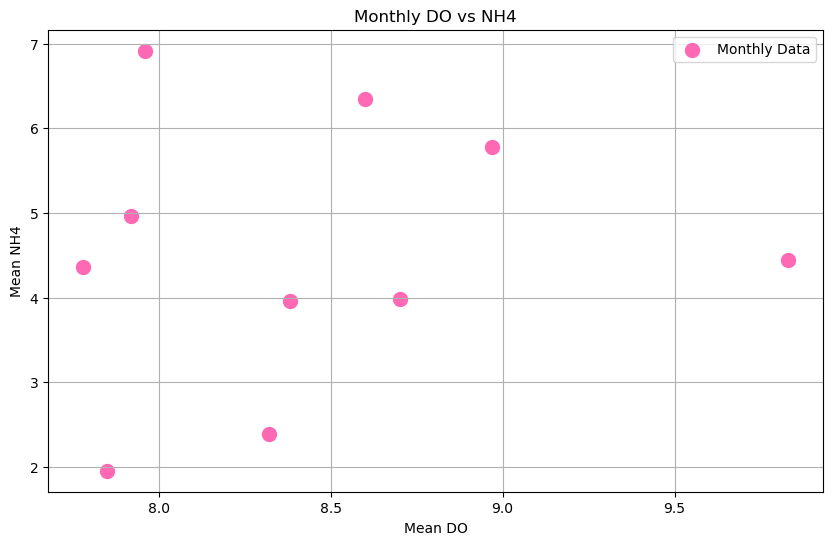

In [44]:
monthly_data = pd.merge(monthly_do, monthly_nh4, on='Month', suffixes=('_DO', '_NH4'))  
plt.figure(figsize=(10, 6))  
plt.scatter(monthly_data['DO'], monthly_data['NH4-N'], color='hotpink', label='Monthly Data', s=100)  
plt.title('Monthly DO vs NH4')  
plt.xlabel('Mean DO')  
plt.ylabel('Mean NH4')  
plt.grid()  
plt.legend()  
plt.show()  

Construct an interpolating polynomial to estimate the DO for the entire year starting from day 1 to day
365. Visualise the interpolated and monthly data (with monthly data plotted as points).

In [37]:
months = monthly_data['Month'].values  
do_values = monthly_data['DO'].values  

interpolation_function = interp1d(months, do_values, kind='linear', fill_value='interpolate')  
days = np.arange(1, 366)  
approx_months = np.clip(np.floor(days / 30.5), 1, 12)
estimated_do = interpolation_function(approx_months)  

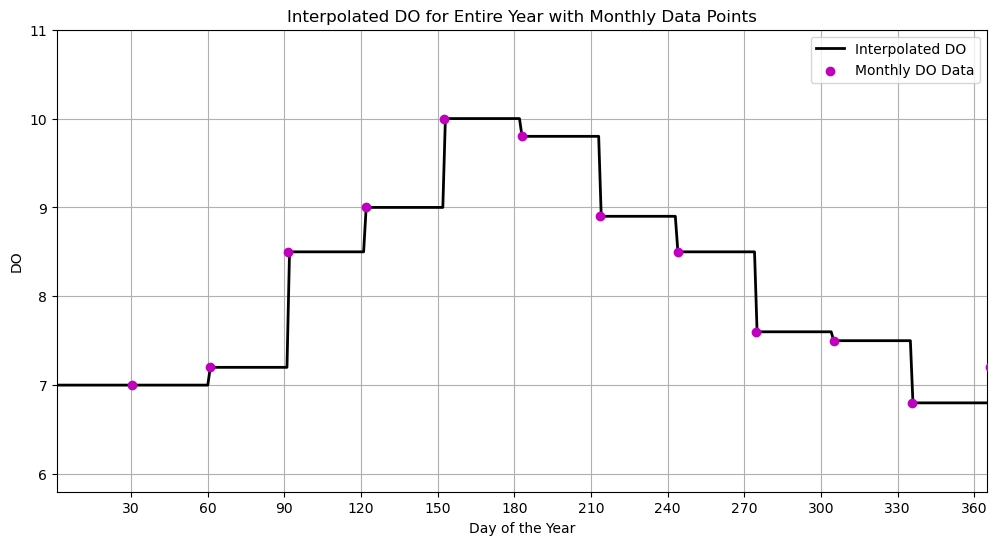

In [40]:
plt.figure(figsize=(12, 6))  
plt.plot(days, estimated_do, color='k', label='Interpolated DO', linewidth=2)  
plt.scatter(months * 30.5, do_values, color='m', label='Monthly DO Data', zorder=5)  
plt.title('Interpolated DO for Entire Year with Monthly Data Points')  
plt.xlabel('Day of the Year')  
plt.ylabel('DO')  
plt.xticks(np.arange(0, 366, 30))
plt.xlim(1, 365)  
plt.ylim(min(do_values) - 1, max(do_values) + 1)  
plt.grid()
plt.legend()  
plt.show()